In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Omitted Variable Bias #

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


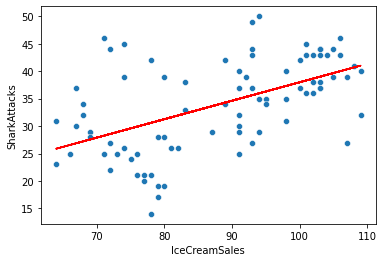

In [60]:
shark = pd.read_csv('http://uclspp.github.io/PUBLG100/data/shark_attacks.csv')
sns.scatterplot(shark['IceCreamSales'], shark['SharkAttacks'])
x1 = shark['IceCreamSales']
y1 = shark['SharkAttacks']
m1, b1 = np.polyfit(x1, y1, 1)
plt.plot(x1, m1*x1+b1, color = 'red')

In [61]:
X = sm.add_constant(shark[['IceCreamSales']])
y = shark['SharkAttacks']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SharkAttacks   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     32.77
Date:                Tue, 11 May 2021   Prob (F-statistic):           1.65e-07
Time:                        00:02:26   Log-Likelihood:                -283.69
No. Observations:                  84   AIC:                             571.4
Df Residuals:                      82   BIC:                             576.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3523      5.238      0.831      0.408      -6.067      14.772
IceCreamSales     0.3363      0.059      5.725      0.000       0.219       0.453
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.423
Skew:                           0.161   Prob(JB):                        0.809
Kurtosis:                       2.871   Cond. No.                         597.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
shark.corr()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
Year,1.000000,0.000000,-0.033364,0.010930,0.013402
Month,0.000000,1.000000,0.275968,0.270830,-0.261145
SharkAttacks,-0.033364,0.275968,1.000000,0.716966,0.534358
Temperature,0.010930,0.270830,0.716966,1.000000,0.595769
IceCreamSales,0.013402,-0.261145,0.534358,0.595769,1.000000


In [63]:
X = sm.add_constant(shark[['IceCreamSales', 'Temperature']])
y = shark['SharkAttacks']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SharkAttacks   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     46.01
Date:                Tue, 11 May 2021   Prob (F-statistic):           4.47e-14
Time:                        00:02:26   Log-Likelihood:                -265.94
No. Observations:                  84   AIC:                             537.9
Df Residuals:                      81   BIC:                             545.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5651      4.305      0.131      0.896      -8.001       9.131
IceCreamSales     0.1046      0.060      1.756      0.083      -0.014       0.223
Temperature       1.2928      0.198      6.528      0.000       0.899       1.687
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   2.505
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.672
Skew:                           0.166   Prob(JB):                        0.263
Kurtosis:                       3.809   Cond. No.                         616.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of ice cream sales decreased and the pvalue increased to above .05 indicating that the IceCreamSales predictor is not statistically signficant with 95% confidence

# Perfect Multicollinearity #


In [64]:
shark['SalesNTax'] = shark['IceCreamSales'] * 1.25
shark.corr()

,Year,Month,SharkAttacks,Temperature,IceCreamSales,SalesNTax
Year,1.000000,0.000000,-0.033364,0.010930,0.013402,0.013402
Month,0.000000,1.000000,0.275968,0.270830,-0.261145,-0.261145
SharkAttacks,-0.033364,0.275968,1.000000,0.716966,0.534358,0.534358
Temperature,0.010930,0.270830,0.716966,1.000000,0.595769,0.595769
IceCreamSales,0.013402,-0.261145,0.534358,0.595769,1.000000,1.000000
SalesNTax,0.013402,-0.261145,0.534358,0.595769,1.000000,1.000000


In [65]:
#just ice cream sales
X = sm.add_constant(shark[['IceCreamSales']])
y = shark['SharkAttacks']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SharkAttacks   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     32.77
Date:                Tue, 11 May 2021   Prob (F-statistic):           1.65e-07
Time:                        00:02:26   Log-Likelihood:                -283.69
No. Observations:                  84   AIC:                             571.4
Df Residuals:                      82   BIC:                             576.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3523      5.238      0.831      0.408      -6.067      14.772
IceCreamSales     0.3363      0.059      5.725      0.000       0.219       0.453
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.423
Skew:                           0.161   Prob(JB):                        0.809
Kurtosis:                       2.871   Cond. No.                         597.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#just sales and tax
X = sm.add_constant(shark[['SalesNTax']])
y = shark['SharkAttacks']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SharkAttacks   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     32.77
Date:                Tue, 11 May 2021   Prob (F-statistic):           1.65e-07
Time:                        00:02:26   Log-Likelihood:                -283.69
No. Observations:                  84   AIC:                             571.4
Df Residuals:                      82   BIC:                             576.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3523      5.238      0.831      0.408      -6.067      14.772
SalesNTax      0.2690      0.047      5.725      0.000       0.176       0.362
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.423
Skew:                           0.161   Prob(JB):                        0.809
Kurtosis:                       2.871   Cond. No.                         746.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
X = sm.add_constant(shark[['IceCreamSales', 'SalesNTax']])
y = shark['SharkAttacks']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SharkAttacks   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     32.77
Date:                Tue, 11 May 2021   Prob (F-statistic):           1.65e-07
Time:                        00:02:26   Log-Likelihood:                -283.69
No. Observations:                  84   AIC:                             571.4
Df Residuals:                      82   BIC:                             576.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3523      5.238      0.831      0.408      -6.067      14.772
IceCreamSales     0.1312      0.023      5.725      0.000       0.086       0.177
SalesNTax         0.1640      0.029      5.725      0.000       0.107       0.221
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.423
Skew:                           0.161   Prob(JB):                        0.809
Kurtosis:                       2.871   Cond. No.                     1.79e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.36e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Heteroskedasticity #

In [68]:
n = 100
x = 25*np.random.randn(n)
x = x[x > 0]
sigma = 2.5
noise = sigma*np.random.randn(len(x))

y = 280 + 3*x + noise*x
#y = 280 + 3*x + noise

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


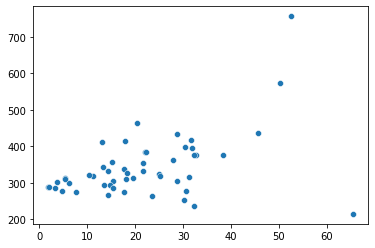

In [69]:
sns.scatterplot(x, y)

In [70]:
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     12.09
Date:                Tue, 11 May 2021   Prob (F-statistic):            0.00107
Time:                        00:02:27   Log-Likelihood:                -294.11
No. Observations:                  51   AIC:                             592.2
Df Residuals:                      49   BIC:                             596.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.6014     21.035     13.340      0.000     238.330     322.873
x1             2.8817      0.829      3.477      0.001       1.216       4.547
==============================================================================
Omnibus:                       21.254   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.877
Skew:                           0.788   Prob(JB):                     1.36e-19
Kurtosis:                       9.197   Cond. No.                         48.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


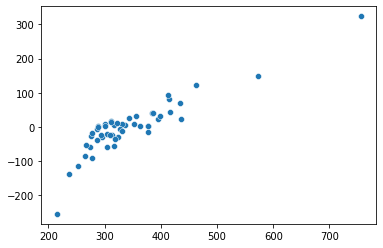

In [71]:
y_pred = model.predict(X)
sns.scatterplot(y,y-y_pred)

In [72]:
model = sm.RLM(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   51
Model:                            RLM   Df Residuals:                       49
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 11 May 2021                                         
Time:                        00:02:27                                         
No. Iterations:                    12                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.3360     12.714     21.971      0.000     254.417     304.255
x1             2.8074      0.501      5.604      0.000       1.826       3.789
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


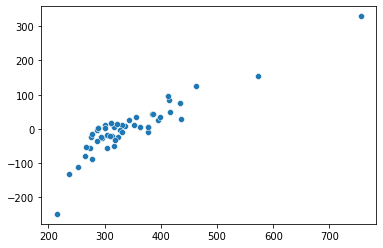

In [73]:
y_pred = model.predict(X)
sns.scatterplot(y,y-y_pred)

# Nonlinearity #

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


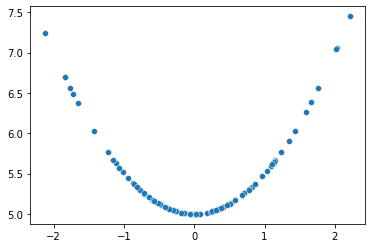

In [74]:
#True form of exponential data
n = 100
x = np.random.randn(n)
ytrue = 5 + 0.5*x**2

sns.scatterplot(x, ytrue)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


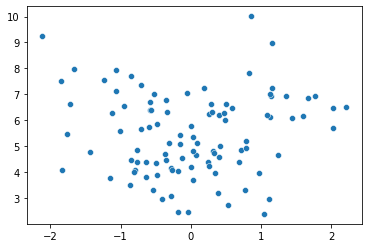

In [75]:
#noisy form of exponential data
noise = 1.5*np.random.randn(n)
ynoise = ytrue+noise

sns.scatterplot(x, ynoise)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


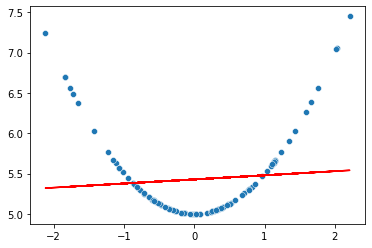

In [76]:
#True form linear regression
sns.scatterplot(x, ytrue)
m, b = np.polyfit(x, ytrue, 1)
plt.plot(x, m*x+b, color = 'r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


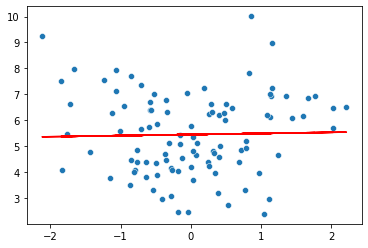

In [77]:
#noisy form linear regression
sns.scatterplot(x, ynoise)
m, b = np.polyfit(x, ynoise, 1)
plt.plot(x, m*x+b, color = 'r')

In [78]:
X = sm.add_constant(x)
model = sm.OLS(ynoise, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.06015
Date:                Tue, 11 May 2021   Prob (F-statistic):              0.807
Time:                        00:02:28   Log-Likelihood:                -186.45
No. Observations:                 100   AIC:                             376.9
Df Residuals:                      98   BIC:                             382.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4493      0.158     34.548      0.000       5.136       5.762
x1             0.0418      0.171      0.245      0.807      -0.297       0.380
==============================================================================
Omnibus:                        1.210   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                1.251
Skew:                           0.252   Prob(JB):                        0.535
Kurtosis:                       2.786   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


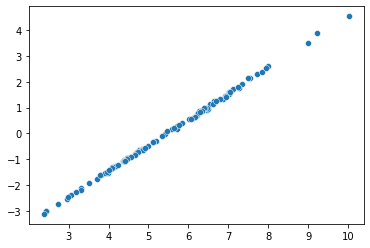

In [79]:
#check for nonlinearity using residual plot
y_pred = model.predict(X)
sns.scatterplot(ynoise,ynoise-y_pred)
#if there is a pattern then there's a problem!